In [1]:
import palmerpenguins
import matplotlib.pyplot as plt

In [2]:
penguins = palmerpenguins.load_penguins().dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


## Pairplot with Matplotlib

Let's create a pairplot with Matplotlib from scratch. This chart is useful to see the relationship between numerical variables and their distributions for some groups of observations. In this case, observations are grouped according to the species. The numerical variables are those in the `COLUMNS` list.

In [3]:
COLUMNS = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
COLORS = ["#386cb0", "#fdb462", "#7fc97f"]
SPECIES = ["Adelie", "Gentoo", "Chinstrap"]

And now the plot:

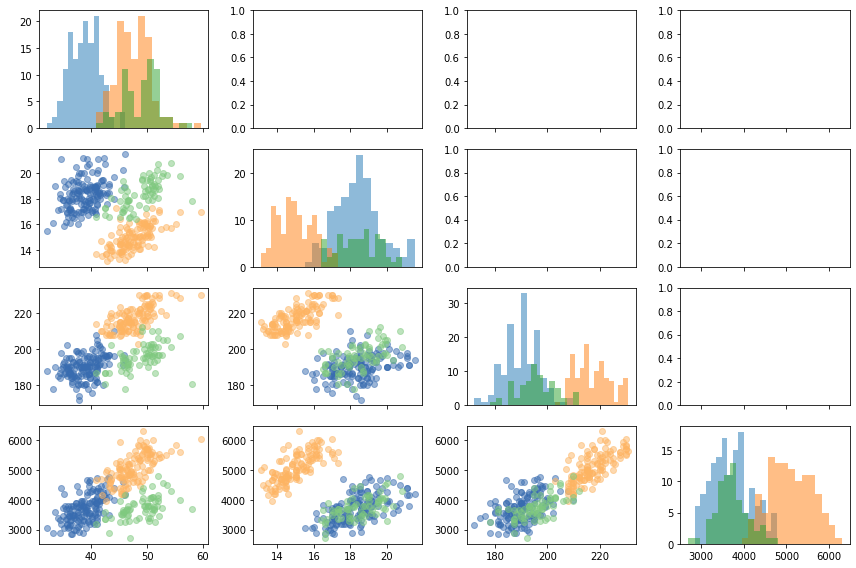

In [4]:
# A layout of 4x4 subplots
fig, axes = plt.subplots(4, 4, figsize = (12, 8), sharex="col", tight_layout=True)

for i in range(len(COLUMNS)):
    for j in range(len(COLUMNS)):
        # If this is the lower-triangule, add a scatterlpot for each group.
        if i > j:
            for species, color in zip(SPECIES, COLORS):
                data = penguins[penguins["species"] == species]
                axes[i, j].scatter(COLUMNS[j], COLUMNS[i], color=color, alpha=0.5, data=data)
                
        # If this is the main diagonal, add histograms
        if i == j:
            for species, color in zip(SPECIES, COLORS):
                data = penguins[penguins["species"] == species]
                axes[i, j].hist(COLUMNS[j], bins=15, alpha=0.5, data=data)

## Remove unused axes

The code above shows it is not that hard to create a pairplot from scratch with Matplotlib. But those empty subplots on the upper triangle are now something we would like to keep on our viz. Let's remove them! 

`ax.remove()` is all we need. It simply removes the axis from the figure. Let's loop through the axes again, but this time removing those on the upper triangle of the layout.

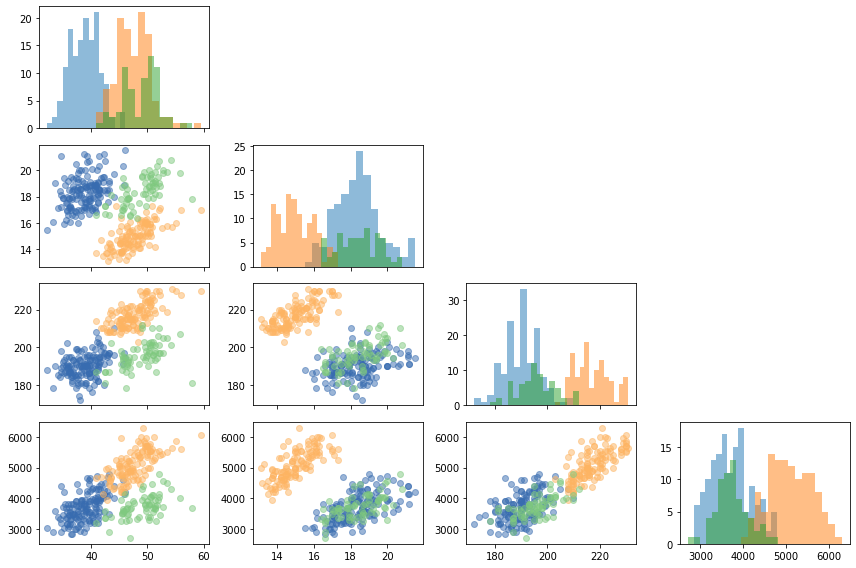

In [5]:
for i in range(len(COLUMNS)):
    for j in range(len(COLUMNS)):
        # If on the upper triangle
        if i < j:
            axes[i, j].remove()

# See the chart now
fig